# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откройте файл с данными и изучите общую информацию.

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/datasets/real_estate_data.csv", sep="\t")

In [ ]:
data=df
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

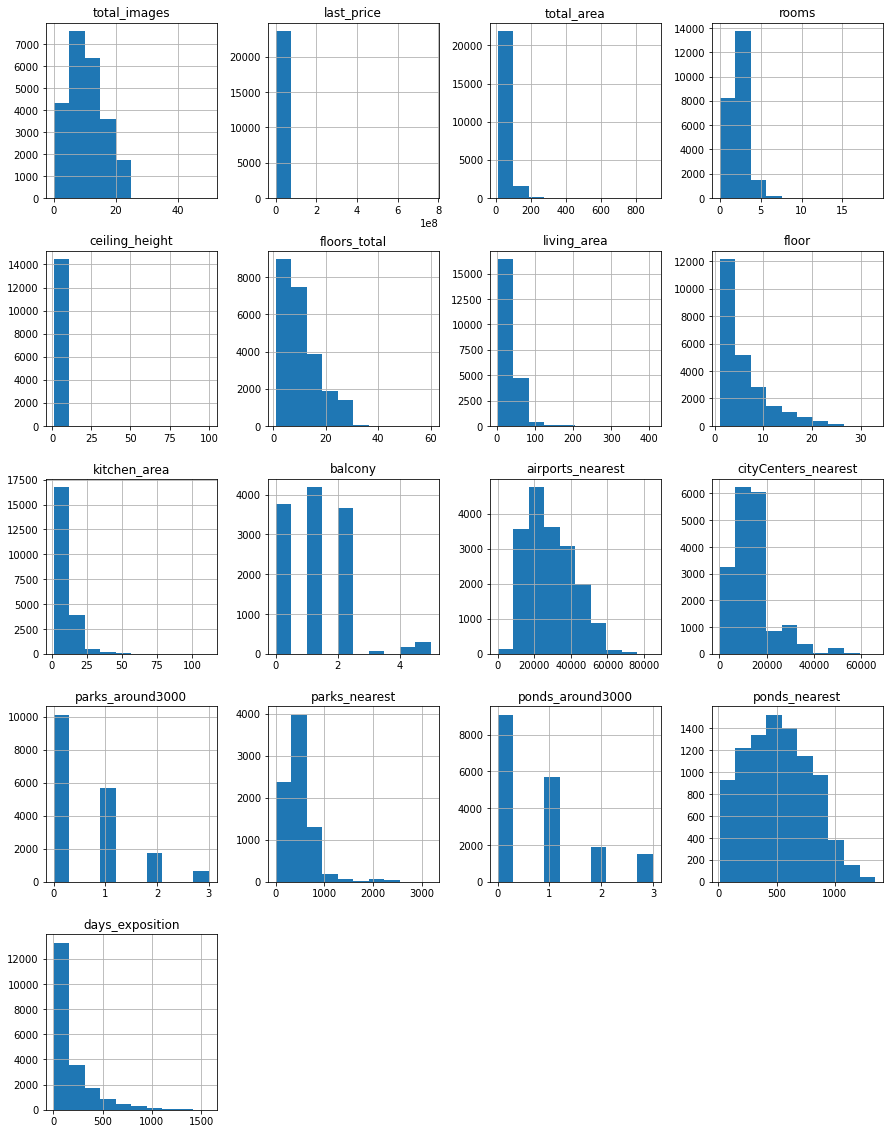

In [ ]:
df.hist(figsize=(15, 20))

В таблице присутствую пропуски и ошибки в типах данных. Размер таблицы 23699 строк и 22 столбца.

### Предобработка данных

In [ ]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
df['balcony'] = df['balcony'].fillna(0)

In [ ]:
df.dropna(subset=['locality_name'], inplace=True)

In [ ]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [ ]:
ceiling_medians = df.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_medians.columns = ['median', 'count']
ceiling_medians.head()
for floor in ceiling_medians.index:
    df.loc[(df['floors_total'].isna()) |
             ((df['floors_total'] == floor) & (ceiling_medians.loc[floor, 'count'] == 0)),
             'ceiling_height'] = df['ceiling_height'].describe()

for floor in ceiling_medians.index:
    df.loc[(df['ceiling_height'].isna()) &
             (df['floors_total'] == floor),
             'ceiling_height'] = ceiling_medians.loc[floor, 'median']

In [ ]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height             86
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

Для остальных столбцов логичную замену предложить невозможно, поэтому эти значения остались пустыми. Причиной пропусков может служить невнимательность человека при заполнении таблицы или технический сбой.

In [ ]:
df['is_apartment'] = df['is_apartment'].astype(bool)
df['balcony'] = df['balcony'].astype(int)
df["first_day_exposition"]=pd.to_datetime(df["first_day_exposition"],format = '%Y-%m-%d')
df['last_price'] = df['last_price'].astype('int')

Изменить тип данных некоторых столбцов потребовалось для облегчения дальнейшего анализа имеющихся данных

In [ ]:
df['locality_name'] = df['locality_name'].str.lower()

In [ ]:
df['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [ ]:
df['locality_name'] = df['locality_name'].str.replace("ё", "е")

df['locality_name'].drop_duplicates()

0                  санкт-петербург
1                   поселок шушары
5        городской поселок янино-1
6                поселок парголово
8                   поселок мурино
                   ...            
22938               деревня нижняя
23048    коттеджный поселок лесное
23354            деревня тихковицы
23411       деревня борисова грива
23683         поселок дзержинского
Name: locality_name, Length: 330, dtype: object

In [ ]:
df['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

In [ ]:
df["ceiling_height"].unique()

array([  2.7 ,   2.75,   2.55,   2.6 ,   3.03,   2.65,   2.66,   2.5 ,
         2.67,   2.56,   3.  ,   3.05,   2.8 ,   2.9 ,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,    nan,   2.47,   2.73,   2.84,   3.1 ,
         2.34,   3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,
        25.  ,   2.58,   3.7 ,  14.85,   2.52,   5.2 ,   2.87,   2.59,
         2.  ,   2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,
         3.55,   3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,
         5.3 ,   5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,
         3.53,   2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,
         3.9 ,   3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,
         3.98,   2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,
         3.87,   3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,
         4.2 ,   3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,
      

In [ ]:
wrong=[25.,14.85,32.,27.,24.,26.,14.,20.,22.6,100.]
right=[2.5,1.485,3.2,2.7,2.4,2.6,1.4,2.0,2.26,10.0]
df["ceiling_height"] = df["ceiling_height"].replace(wrong, right)

df = df[(df["ceiling_height"] >=2.4) & (df["ceiling_height"] <=3.5)]

In [ ]:
df["ceiling_height"].unique()

array([2.7 , 2.75, 2.55, 2.6 , 3.03, 2.65, 2.66, 2.5 , 2.67, 2.56, 3.  ,
       3.05, 2.8 , 2.9 , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       3.5 , 3.3 , 2.71, 2.47, 2.73, 2.84, 3.1 , 3.4 , 3.06, 2.72, 2.54,
       2.51, 2.78, 2.76, 2.58, 2.52, 2.87, 2.59, 2.45, 2.92, 3.11, 3.13,
       3.15, 3.16, 3.12, 2.53, 2.74, 2.96, 2.46, 2.79, 2.95, 2.94, 2.83,
       2.4 , 3.38, 3.01, 3.18, 3.35, 2.48, 2.62, 2.82, 2.63, 2.88, 3.24,
       3.36, 3.08, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81, 3.44, 2.97, 3.14,
       2.68, 3.22, 3.27, 2.93, 3.46, 3.47, 3.33, 3.32, 2.98, 2.86, 3.17,
       3.28, 3.04, 3.23, 3.02, 3.21, 3.43, 3.39, 2.69, 3.31, 3.42, 2.99,
       3.49, 2.91, 3.29, 2.89, 2.49, 3.48])

In [ ]:
df['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

In [ ]:
df['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 24, 23, 30, 29, 33, 31])

In [ ]:
df['is_apartment'].unique()

array([False,  True])

In [ ]:
df['total_area'].value_counts()
df = df[(df["total_area"]>=28)&(df["total_area"]<=200)]
df['total_area'].value_counts()

45.00     417
42.00     382
31.00     346
60.00     343
44.00     342
         ... 
146.10      1
170.70      1
50.94       1
136.20      1
55.06       1
Name: total_area, Length: 1858, dtype: int64

Минимальная площадь квартиры может составлять 28 кв.м., а максимальную площадь будем считать 200 кв.м.

In [ ]:
df['rooms'].unique()
df = df[df["rooms"]<=6]
df['rooms'].unique()

array([3, 1, 2, 4, 5, 6, 0])

Предположительно по данным, полученным из интернета, максимальное количество комнат в квартире-6.

In [ ]:
df['living_area'].unique()

array([51.  , 18.6 , 34.3 , ..., 29.81, 31.65, 42.55])

In [ ]:
df["last_price"].value_counts()
df["last_price"].describe()
df=df[(df["last_price"]>=1000000)&(df["total_area"]<=30000000)]
df["last_price"].value_counts()

4500000     340
3500000     287
4300000     259
4200000     255
4000000     254
           ... 
16070000      1
9476000       1
12371278      1
5748000       1
11615600      1
Name: last_price, Length: 2725, dtype: int64

Возьмем минимальную стоимость квартиры от 1000000, а максимальную стоимость 30000000.

In [ ]:
a=df.shape[0] / data.shape[0]*100
print(a)

94.95983086680762


В итоге было отброшено около 5% данных, что не превышает 10% от изначального объема данных.

Аномальные значения встречаются только в одном столбце, данные в остальных столбцах приемлемые. В столбце "ceiling_height" были данные,которые не могут быть реальными, так как высота потолков не может быть меньше 2.5 м и не больше 3.5 м.

### Посчитайте и добавьте в таблицу новые столбцы

In [ ]:
df['price_per_square_meter'] = df['last_price'] / df['total_area']

df['price_per_square_meter'] = df['price_per_square_meter'].astype('int')

df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

df['month_exposition'] = df['first_day_exposition'].dt.month

df['year_exposition'] = df['first_day_exposition'].dt.year

df.loc[df['floor'] == 1, 'floor_category'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_category'] = 'последний'
df.loc[df['floor_category'].isna(), 'floor_category'] = 'другой'

df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(999999)
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int')

### Проведите исследовательский анализ данных

Целесообразно изучить и описать основные параметры, необходимые при анализе.

count    22458.000000
mean        58.405300
std         25.792549
min         28.000000
25%         40.500000
50%         52.000000
75%         69.000000
max        200.000000
Name: total_area, dtype: float64

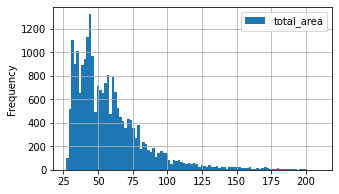

In [ ]:
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (27,210))
df['total_area'].describe()
#распределение данных нормальное, есть выбросы, но они не сильно влияют на данные, чаще всего встречаются квартиры плащадью от 28 кв.м до 50 кв.м

count    2.245800e+04
mean     6.041295e+06
std      6.130914e+06
min      1.000000e+06
25%      3.500000e+06
50%      4.650000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

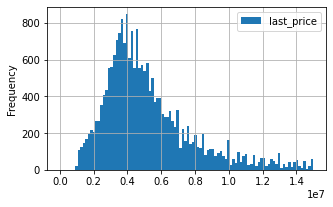

In [ ]:
df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
df['last_price'].describe()
#с данными все впорядке но значения выводятся в экспоненциальной записи чисел, большинство квартир продается по цене от 0,2*10^7 до 0,6*10^7.

count    22458.000000
mean         2.046798
std          0.965583
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

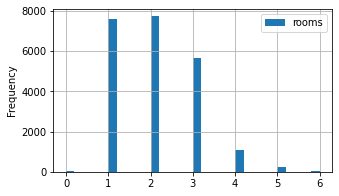

In [ ]:
df.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
df['rooms'].describe()
#с данными все впорядке,чаще всего встречаются квартиры 1- и 2-комнатные.

count    22458.000000
mean         2.691906
std          0.191667
min          2.400000
25%          2.550000
50%          2.650000
75%          2.750000
max          3.500000
Name: ceiling_height, dtype: float64

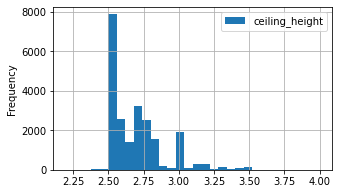

In [ ]:
df.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2.2,4), grid=True, figsize = (5,3))
df['ceiling_height'].describe()
#с данными все впорядке, большинство квартир имеет высоту от 2,5 м до 2,75 м.

count    20729.000000
mean        33.240508
std         16.893631
min          2.000000
25%         18.800000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

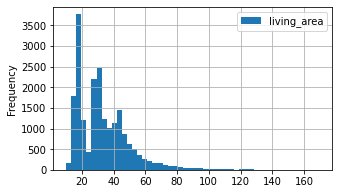

In [ ]:
df.plot(y = 'living_area', kind = 'hist', bins = 50, range = (10,170), grid=True, figsize = (5,3))
df['living_area'].describe()
#в основном жилая площадь составляет от 10 кв.м до 50 кв.м

count    20614.000000
mean        10.370428
std          5.271573
min          1.300000
25%          7.000000
50%          9.070000
75%         11.900000
max         93.000000
Name: kitchen_area, dtype: float64

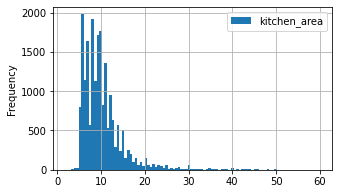

In [ ]:
df.plot(y = 'kitchen_area', kind = 'hist', bins = 100, range = (2,60), grid=True, figsize = (5,3))
df['kitchen_area'].describe()
#чаще всего встречаются к вартиры с площадью кухни от 5 кв.м до 15 кв.м

count    22458.000000
mean         5.903999
std          4.860695
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

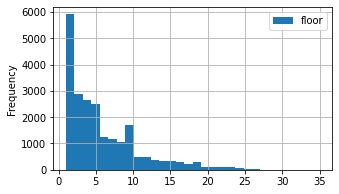

In [ ]:
df.plot(y = 'floor', kind = 'hist', bins = 30, range = (1,35), grid=True, figsize = (5,3))
df['floor'].describe()
#чаще всего квартиры продаются до 5 этажа включительно

count      22458
unique         3
top       другой
freq       16635
Name: floor_category, dtype: object

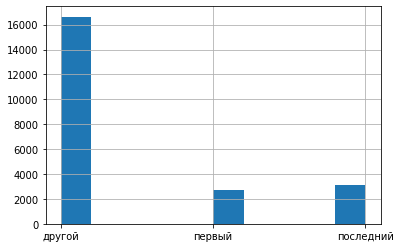

In [ ]:
df["floor_category"].hist()
df['floor_category'].describe()
#в основном продают квартиры не на первом и не на последнем этажах

count    22458.000000
mean        10.764894
std          6.556487
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

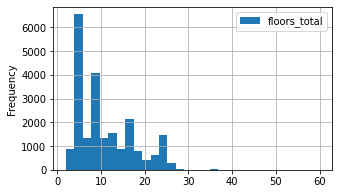

In [ ]:
df.plot(y = 'floors_total', kind = 'hist', bins = 30, range = (2,60), grid=True, figsize = (5,3))
df['floors_total'].describe()
#чаще всего в домах,где продают квартиры до 20 этажей

count    17381.000000
mean     14412.209654
std       8563.934968
min        181.000000
25%       9647.000000
50%      13223.000000
75%      16383.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

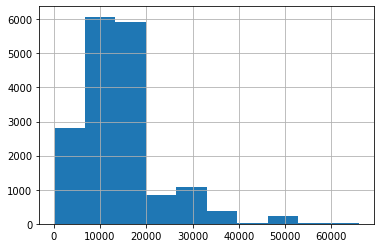

In [ ]:
df['cityCenters_nearest'].hist()
df['cityCenters_nearest'].describe()
#продающиеся квартиры чаще всего находятся на расстоянии до 20000 м включительно от центра города

count    7627.000000
mean      492.478301
std       344.326949
min         1.000000
25%       288.000000
50%       455.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

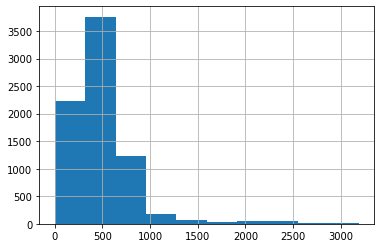

In [ ]:
df['parks_nearest'].hist()
df['parks_nearest'].describe()
#ближайшие парки в основном находятся на расстоянии до 1000 м

count    17361.000000
mean     28941.570416
std      12725.487337
min          0.000000
25%      18471.000000
50%      27089.000000
75%      37434.000000
max      84869.000000
Name: airports_nearest, dtype: float64

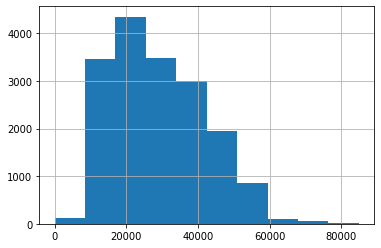

In [ ]:
df['airports_nearest'].hist()
df['airports_nearest'].describe()
#в основном квартиры находятся на расстоянии от 10000 м до 50000 м до ближайшего аэропорта

count    22458.000000
mean         2.565500
std          1.789722
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

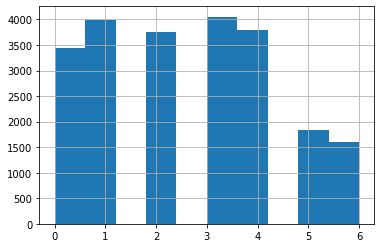

In [ ]:
df['weekday_exposition'].hist()
df['weekday_exposition'].describe()
#чаще всего размещают объявления в будние дни

count    22458.000000
mean         6.408184
std          3.493537
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

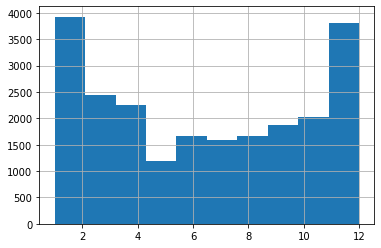

In [ ]:
df['month_exposition'].hist()
df['month_exposition'].describe()
#в основном объявления размещают с января по февраль и с ноября по декабрь

count    19478.000000
mean       180.260345
std        219.052859
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

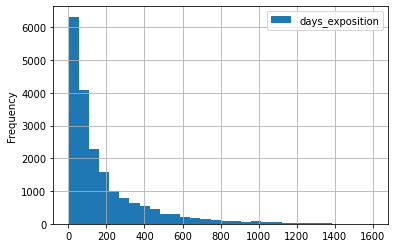

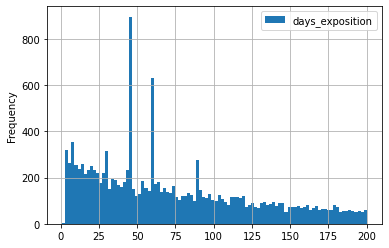

In [ ]:
import matplotlib.pyplot as plt

df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

df[df['days_exposition']!=0]['days_exposition'].describe()

In [ ]:
df['days_exposition'].value_counts().head(10)

45.0    813
60.0    529
7.0     225
30.0    201
90.0    184
4.0     167
3.0     152
5.0     144
14.0    137
20.0    133
Name: days_exposition, dtype: int64

Среднее значение - 180 дней, а медиана - 95 дней. Сделав гистограмму со значениями от 0 до 200 с кол-вом корзин 100, обнаружили выбивающиеся значения и методом value_counts убедились в этом - у нас аномалии на 45, 60, 7, 30, 90 днях - это наиболее популярное количество дней до снятия объявления. Продажи можно считать быстрыми, если они совершены до 45 дней включительно, а необычно долгими- более 229 дней.

0.6533595718982143

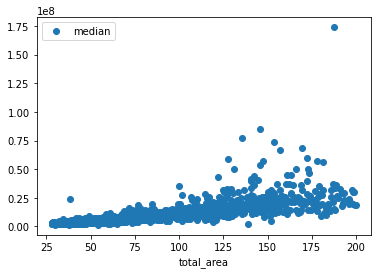

In [ ]:
pivot_table_total_area = df.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

df['total_area'].corr(df['last_price'])

С увеличением площади увеличивается цена за квартиру( не во всех случаях, но в большинстве).

0.5304866351904928

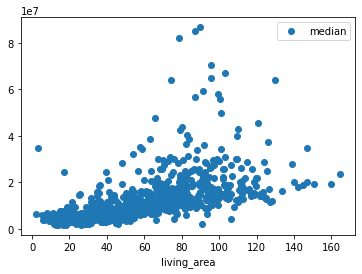

In [ ]:
pivot_table_total_area = df.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

df['living_area'].corr(df['last_price'])

Наблюдается слабая зависимость(по коэффициенту корреляции Пирсона), которая значит, что с увеличением жилой площади увеличивается и цена на квартиру.

0.5147327039827365

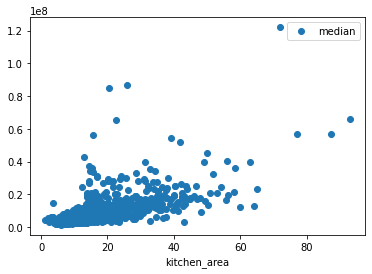

In [ ]:
pivot_table_total_area = df.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

df['kitchen_area'].corr(df['last_price'])

Чем больше площадь кухни, тем немного больше стоимость,но эта зависимость ярко не выражена.

0.3667834522464322

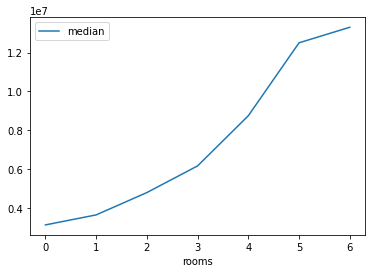

In [ ]:
pivot_table_rooms = df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

df['rooms'].corr(df['last_price'])

С увеличением числа комнат цена на квартиру увеличивается.

,mean,count,median
floor_category,,,
другой,6.300382e+06,16635,4850000
первый,4.724664e+06,2717,3990000
последний,5.805417e+06,3106,4300000


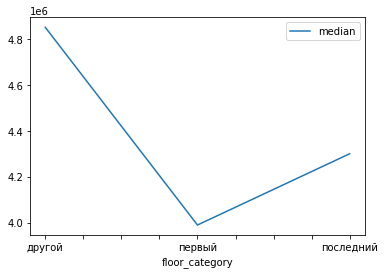

In [ ]:
pivot_table_floor_category = df.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

Самая низкая стоимость у квартир на первом этаже, а самая высокая стоимость у квартир не на 1 и не на последнем этажах, цена для последних этажей находится между ценой за квартиру на 1 этаже и на других,кроме последнего.

,mean,count,median
weekday_exposition,,,
1,6.125617e+06,3989,4775000
2,6.070755e+06,3752,4700000
0,6.033609e+06,3433,4650000
3,6.230772e+06,4054,4650000
4,5.869609e+06,3796,4600000
5,5.990397e+06,1827,4600000
6,5.765039e+06,1607,4550000


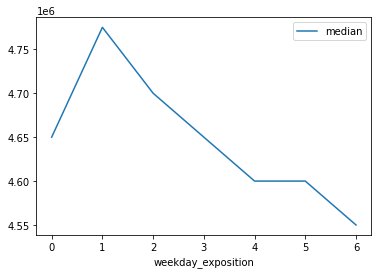

In [ ]:
pivot_table_weekday_exposition = df.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

Самая высокая цена на квартиры наблюдается у объявлений, выставленным во вторник, а самая низкая стоимость у объявлений, выставленным в воскресенье.

,mean,count,median
month_exposition,,,
4,6.146233e+06,2248,4800000
9,6.128737e+06,1880,4700000
11,6.113649e+06,2252,4700000
12,6.169614e+06,1560,4700000
3,5.937518e+06,2445,4690000
2,6.136238e+06,2520,4667500
7,5.966859e+06,1582,4650000
1,6.048634e+06,1406,4600000
8,6.104683e+06,1667,4600000


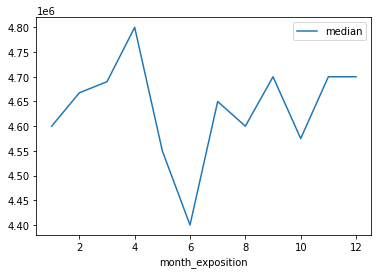

In [ ]:
pivot_table_month_exposition = df.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

Самая высокая стоимость на квартиры в апреле и сентябре! Самая низкая стоимость в мае и июне! Мы видим изменение цены в зависимости от сезона, следовательно, на рынке недвижимости сезонность играет важную роль.

,mean,count,median
year_exposition,,,
2014,1.090976e+07,133,7500000
2015,7.291337e+06,1104,5215000
2019,6.494790e+06,2739,5100000
2018,5.752343e+06,8080,4600000
2016,6.154126e+06,2603,4550000
2017,5.883756e+06,7799,4500000


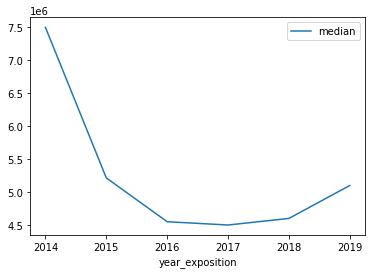

In [ ]:
pivot_table_year_exposition = df.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

Из данных видно, что с 2014 по 2016 цена на квартиры падала, а затем начала снова расти.

In [ ]:
locality_name_sorted_pivot_table = (df.pivot_table(index = 'locality_name',values = ["price_per_square_meter"],aggfunc = ["count","mean"]))
locality_name_sorted_pivot_table.columns = ["count","mean"]
locality_name_sorted_pivot_table.sort_values(by = "count",inplace = True,ascending = False)
locality_name_sorted_pivot_table = locality_name_sorted_pivot_table[:10]
locality_name_sorted_pivot_table

,count,mean
locality_name,,
санкт-петербург,15005,112894.140487
поселок мурино,489,84249.280164
поселок шушары,430,78023.309302
всеволожск,387,68636.408269
пушкин,358,102546.893855
колпино,335,75236.632836
поселок парголово,324,90457.919753
гатчина,304,69028.710526
деревня кудрово,270,91751.400000


По полученной таблице видно, что самая высокая цена в Санкт-Петербург, а самая низкая в Выборге для 10 населённых пунктов с наибольшим числом объявлений.

,last_price,km
0,16390755,0
1,15470632,1
2,11919628,2
3,10427858,3
4,11651519,4
5,12016130,5
6,12557418,6
7,10691553,7
8,8325725,8
9,6407372,9


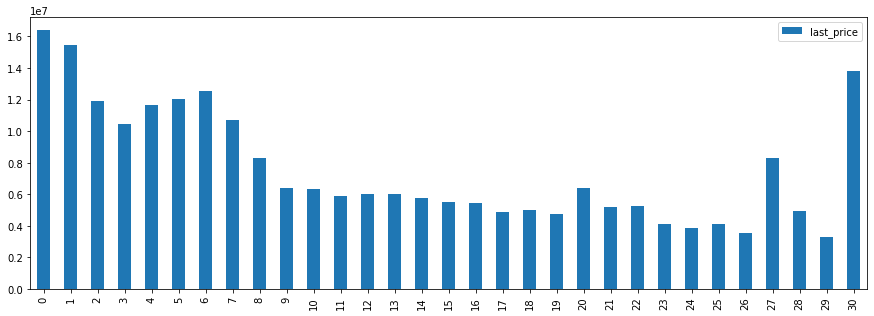

In [ ]:
only_St_Petersburg = df.query('locality_name== "санкт-петербург"')
cityCenters_nearest_km_pivot_table = only_St_Petersburg.pivot_table(index ='cityCenters_nearest_km',
                                                        values = 'last_price',aggfunc = 'mean')
cityCenters_nearest_km_pivot_table = cityCenters_nearest_km_pivot_table.astype('int')
cityCenters_nearest_km_pivot_table['km'] = cityCenters_nearest_km_pivot_table.index
cityCenters_nearest_km_pivot_table.reset_index(drop = True,inplace = True)
cityCenters_nearest_km_pivot_table.plot(y = "last_price",style = 'o',kind = 'bar',figsize = (15,5))
cityCenters_nearest_km_pivot_table

Для квартир в Санкт-Петербурге была выявлена следующая закономерность: чем дальше от центра города, тем в среднем квартира будет стоить дешевле.

### Общий вывод

В ходе проектной работы было сделано:обработка пропущенных значений(там, где это необходимо), замена типов данных на необходимые для удобной работы, также были посчитаны и добавлены в таблицу цена квадратного метра жилья, выведены из даты дни недели, месяцы и года размещения объявлений, добавлены категории по этажам квартир. Перед обработкой данных были изучены некоторые параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков.
После обработки данных и добавления новых параметров по уже имеющимся данным, был проведен анализ итоговых данных и были определены чаще всего встречающиеся значения по каждому параметру. Так стало известно, что чаще всего встречаются квартиры 1- и 2-комнатные, в основном продают квартиры до 5 этажа включительно и т.п.

Мы выявили, что на цену квартиры в значительной мере влияют:количество комнат, тип этажа, день, месяц и год публицкации объявления. В меньшей степени влият-жилая площадь, общая площадь, площадь кухни.Также была замечена корреляция между ценой на квартиру и ее удаленностью от центра, которая подразумевает под собой снижение цены на квартиру в среднем по мере удаления от центра города. Еще одним значимым фактром влияющим на цену является населенный пункт, в котором она расположена. Объявление о продаже в среднем "висит" 180 дней.

В итоге:
- Дата размещения объявления показывает в какой момент лучше продавать квартиру(в какие месяцы или дни недели основной спрос на покупку)
- Этаж квартиры играет непоследюю роль в продаже квартиры. В основном люди редко берут квартиры на первом этаже и квартиры на последним. Следовательно, самыми дорогими считаются квартиры между первым и последним этажом.
- Расстояние от центра города также влияет на стоимость квартиры: чем дальше от центра, тем дешевле.
- Очевидно,что на цену квартиры влияет общая площадь помещения, жилая площадь, площадь кухни и количество комнат в квартире.